In [3]:
import numpy as np
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline
from pandas import read_csv
from datetime import datetime


from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df=pd.read_csv('1st machine.csv')

df['time'] = pd.to_datetime(df['time'])


df.head()

# Updating the header
df.columns=["time","usage"]
df.head()
df.describe()
df.set_index('time',inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8634 entries, 1970-01-01 00:00:01.376314846 to 1970-01-01 00:00:01.378906798
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   usage   8634 non-null   float64
dtypes: float64(1)
memory usage: 134.9 KB


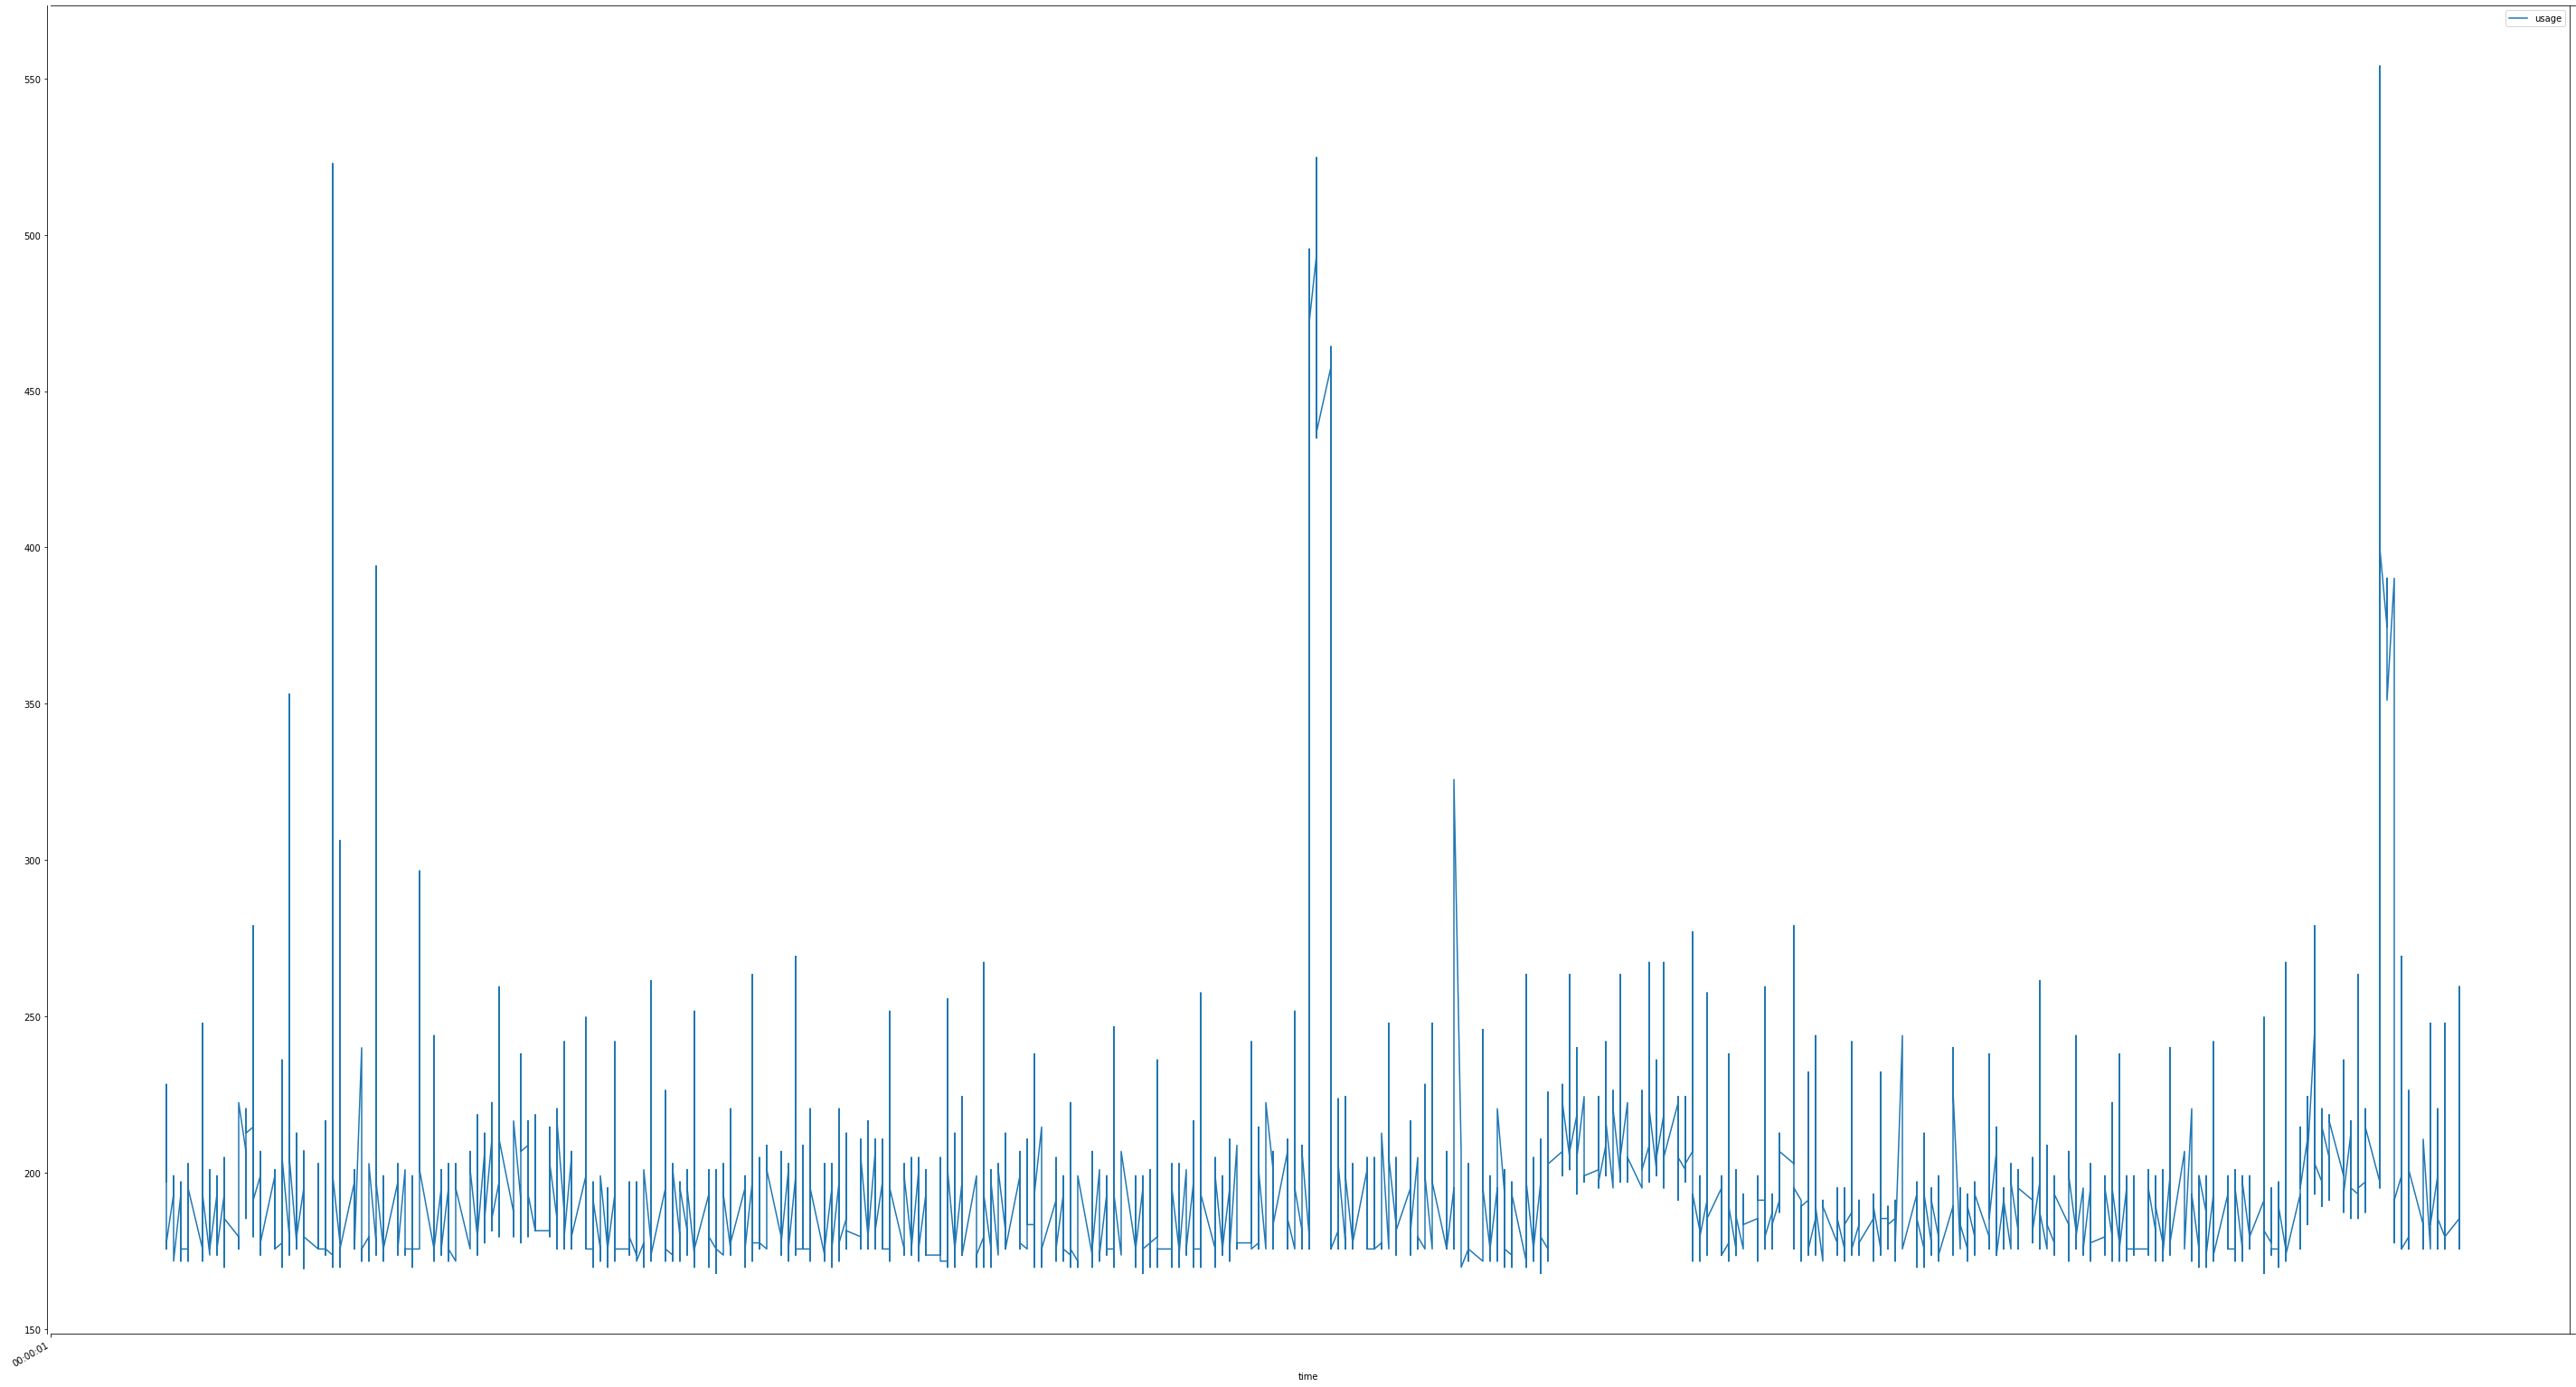

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 50, 30
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['usage'])
def adfuller_test(usage):
    result = adfuller(usage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1]<=0.05:
       print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
       print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['usage'])

ADF Test Statistic : -10.262521747273073
p-value : 4.200381319718832e-18
#Lags Used : 36
Number of Observations : 8597
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [7]:
print(df.shape)
train=df.iloc[:-1000]
test=df.iloc[-1000:]
print(train.shape,test.shape)

(8634, 1)
(7634, 1) (1000, 1)


In [8]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train['usage'],order=(3,1,4))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.usage   No. Observations:                 7633
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -28974.630
Method:                       css-mle   S.D. of innovations             10.769
Date:                Wed, 28 Apr 2021   AIC                          57967.259
Time:                        06:28:22   BIC                          58029.721
Sample:                             1   HQIC                         57988.689
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0026      0.051     -0.052      0.958      -0.102       0.096
ar.L1.D.usage    -0.5865      0.429     -1.368      0.171      -1.427       0.254
ar.L2.D.usage    -0.5849      0.429     -1.364      0.173      -1.425       0.256
ar.L3.D.usage     0.4133      0.428      0.965      0.334      -0.426       1.253
ma.L1.D.usage     0.0005      0.430      0.001      0.999      -0.843       0.844
ma.L2.D.usage     0.2179      0.173      1.257      0.209      -0.122       0.558
ma.L3.D.usage    -0.7079      0.167     -4.243      0.000      -1.035      -0.381
ma.L4.D.usage     0.2098      0.235      0.894      0.371      -0.250       0.670
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5007           -0.8663j            1.0006           -0.3334
AR.2           -0.5007           +0.8663j            1.0006            0.3334
AR.3            2.4166           -0.0000j            2.4166           -0.0000
MA.1           -0.5147           -0.8891j            1.0273           -0.3335
MA.2           -0.5147           +0.8891j            1.0273            0.3335
MA.3            1.6261           -0.0000j            1.6261           -0.0000
MA.4            2.7779           -0.0000j            2.7779           -0.0000
-----------------------------------------------------------------------------
"""

In [13]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

time
1970-01-01 00:00:01.378606769    176.036534
1970-01-01 00:00:01.378607069    179.122110
1970-01-01 00:00:01.378607369    193.550412
1970-01-01 00:00:01.378607669    176.186478
1970-01-01 00:00:01.378607970    179.201361
                                    ...    
1970-01-01 00:00:01.378905598    185.090513
1970-01-01 00:00:01.378905898    174.870772
1970-01-01 00:00:01.378906198    181.157347
1970-01-01 00:00:01.378906498    185.068801
1970-01-01 00:00:01.378906798    174.869267
Name: ARIMA Predictions, Length: 1000, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


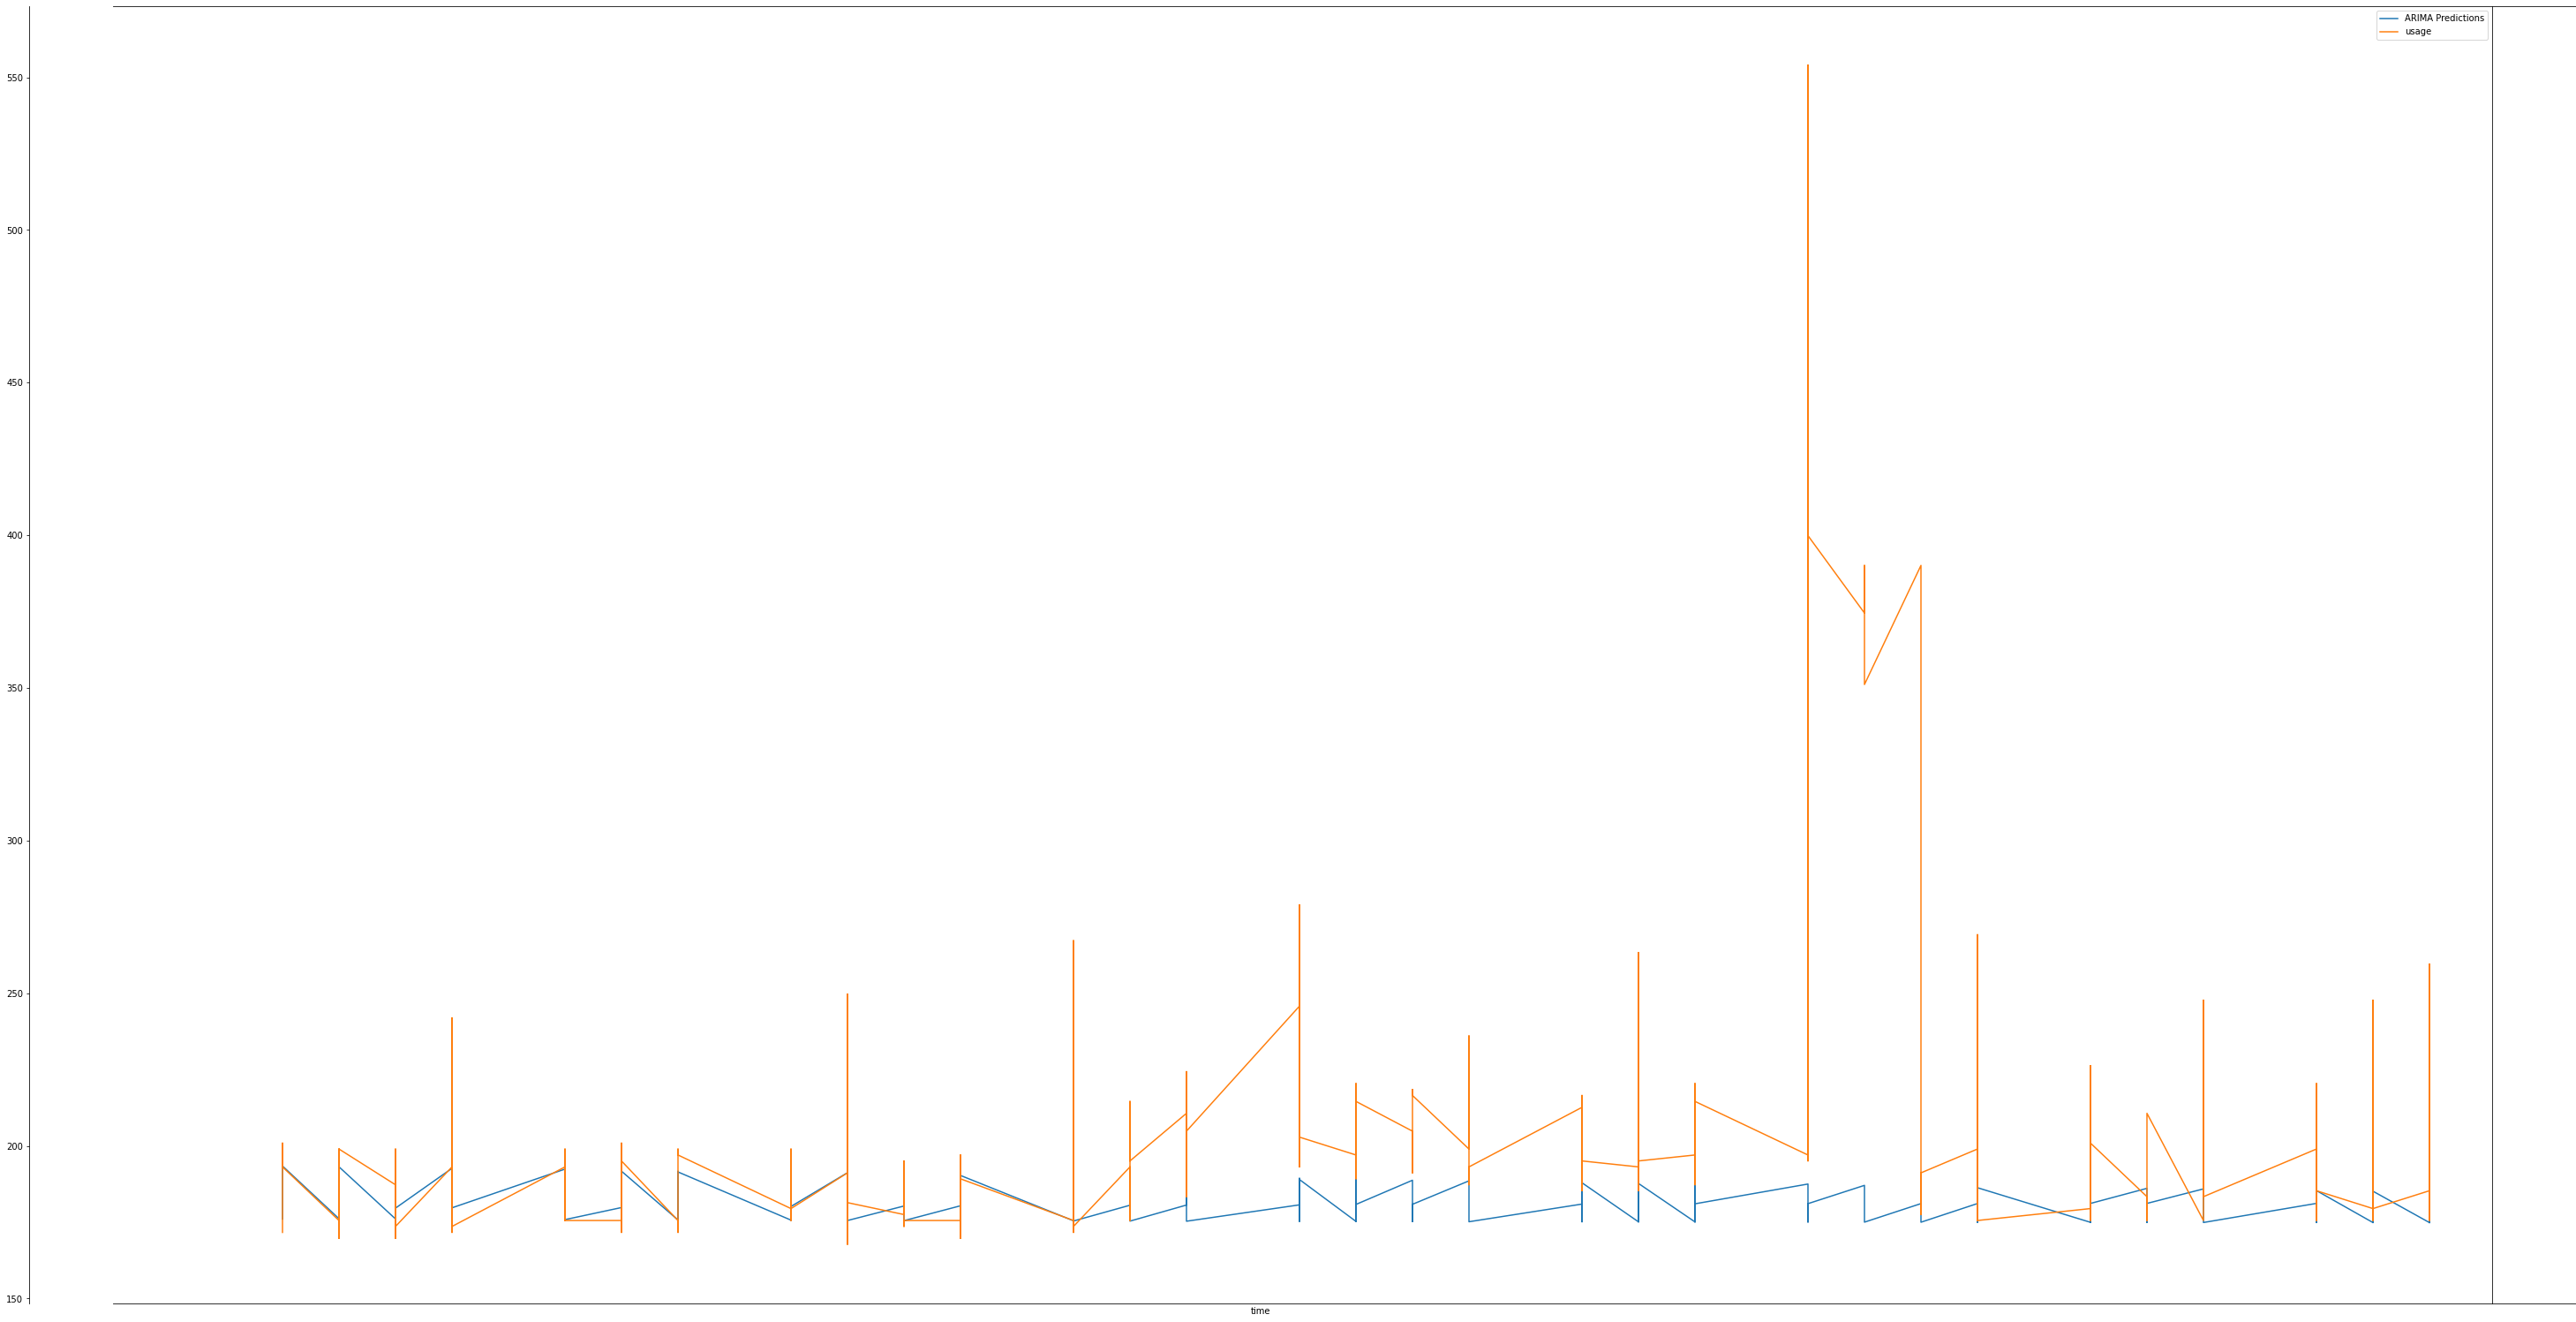

In [14]:
pred.plot(legend=True)
test['usage'].plot(legend=True)